In [ ]:
1) track daily crypto mentions by specific influencers
2) track historical and current crypto trends
3) see if there is a corralation between price spikes and twiitter mentions, and if so how many days it is offset

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

In [11]:
from config1 import consumer_key, consumer_secret, crypto_key


In [5]:
#old stuff
base_url="https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2020-06-01/2020-06-17?apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"
base_url="https://api.polygon.io/v3/reference/tickers?apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"

base_url="https://api.polygon.io/v2/aggs/ticker/DASH/prev?adjusted=true&apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"

base_url="http://rest.coinapi.io/v1/exchangerate/ALICE?apikey=54244F72-7D5F-4173-ADBC-B15B53191244"

base_url="http://rest.coinapi.io/v1/assets?apikey=54244F72-7D5F-4173-ADBC-B15B53191244"

base_url="https://api.polygon.io/v3/reference/tickers?apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl"

base_url='https://api.polygon.io/v1/historic/forex/BTC/USD/2021-10-14?limit=100&apiKey=ui4pRrbHr7mNiqyn6tBCURIIGdQjjWEl'
    




In [6]:
#old stuff
c=requests.get(base_url).json()

In [95]:
#old stuff
#df = pd.DataFrame(c['rates'])

In [12]:
from bs4 import BeautifulSoup
import tweepy

In [57]:
influencers=['Anthony Pompliano', 'Erik Voorhees',
'Ty Smith', 'Tone Vays',
'CryptoCobain',
'Tyler Winklevoss',
'Vitalik Buterin',
'CryptoWendyO',
'StackingUSD',
'Girl Gone Crypto',
'Euclid and Oaks',
'David Gokhshtein',
'Hailey Lennon',
'Justin Sun',
'Ivan on Tech',
'Kenn Bosak',
'CryptoBrekkie',
'Scott Melker',
'TheCryptoDog',
'BitBoy Crypto',
'Dan Held',
'PeterMcCormack',
'LayahHeilpern',
'Coinbound']

influence_ids=["APompliano","ErikVoorhees","ico_dog","ToneVays","CryptoCobain","VitalikButerin","CryptoWendyO",
               "StackingUSD","girlgone_crypto","EuclidAndOaks","davidgokhshtein","HaileyLennonBTC","justinsuntron",
              "IvanOnTech","KennethBosak","CryptoBrekkie","scottmelker","TheCryptoDog","Bitboy_Crypto","danheld",
              "PeterMcCormack","LayahHeilpern","TyDanielSmith"]

In [14]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [15]:
try:
    redirect_url = auth.get_authorization_url()
    print('success')
except tweepy.TweepError:
    print('Error! Failed to get request token.')

success


In [58]:
tweets = api.user_timeline(screen_name=influence_ids[0], 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [34]:
tweets

[Status(_api=<tweepy.api.API object at 0x7fa143048c88>, _json={'created_at': 'Fri Dec 03 17:24:26 +0000 2021', 'id': 1466820636790214672, 'id_str': '1466820636790214672', 'full_text': "Yesterday's #Bitcoin Price Concerns Coming True... Stay Patient!!!\nhttps://t.co/IoJVstbLmX", 'truncated': False, 'display_text_range': [0, 90], 'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [12, 20]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/IoJVstbLmX', 'expanded_url': 'https://youtu.be/MgTmXjklxeY', 'display_url': 'youtu.be/MgTmXjklxeY', 'indices': [67, 90]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2577886615, 'id_str': '2577886615', 'name': 'Tone Vays (#ArrestFauci 🤡🌎)', 'screen_name': 'ToneVays', 'location': 'Clown-World', 'description': 'Deri

In [21]:
for info in tweets[:1]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

ID: 1466820636790214672
2021-12-03 17:24:26+00:00
Yesterday's #Bitcoin Price Concerns Coming True... Stay Patient!!!
https://t.co/IoJVstbLmX




In [29]:
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(tweets)]
df = pd.DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text"])

df

,id,created_at,favorite_count,retweet_count,text
0,1466820636790214672,2021-12-03 17:24:26+00:00,16,3,Yesterday's #Bitcoin Price Concerns Coming Tru...
1,1466819541628039169,2021-12-03 17:20:05+00:00,1,0,"@bobtessier @akheriaty Not really, it's the Ne..."
2,1466776224051736579,2021-12-03 14:27:57+00:00,11,0,"@mark_navea At current rate, next year, the ti..."
3,1466775839291363331,2021-12-03 14:26:26+00:00,0,0,"@NickBell03 @Timcast No, it's actually back to..."
4,1466775177849675777,2021-12-03 14:23:48+00:00,4,0,@MeatBitcoin @DjokerNole They also actually ha...
...,...,...,...,...,...
181,1459756772391071746,2021-11-14 05:35:10+00:00,409,63,Congratulations #Bitcoin Fam!!! The Network ha...
182,1459751595625701376,2021-11-14 05:14:35+00:00,0,0,@RisaAuje So it's clearly true then... this is...
183,1459749645471518725,2021-11-14 05:06:50+00:00,39,2,"@Kitejunkiee I'm with you, I was pro-vaccine u..."
184,1459740731904458754,2021-11-14 04:31:25+00:00,3,0,@_Hugo_Ramos_ @Coinicarus @schwarz @BITVOLT7 @...


In [75]:
for id in enumerate(influence_ids):
    print(id[1])
    tweets = api.user_timeline(screen_name=id[1], 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended')
    time.sleep(1)
    
    outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(tweets)]
    temp_df = pd.DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text"])
    
    print(temp_df.loc[temp_df.text.str.contains("ALICE")])
    
    
    




APompliano
Empty DataFrame
Columns: [id, created_at, favorite_count, retweet_count, text]
Index: []
ErikVoorhees
Empty DataFrame
Columns: [id, created_at, favorite_count, retweet_count, text]
Index: []
ico_dog
Empty DataFrame
Columns: [id, created_at, favorite_count, retweet_count, text]
Index: []
ToneVays
Empty DataFrame
Columns: [id, created_at, favorite_count, retweet_count, text]
Index: []
CryptoCobain
Empty DataFrame
Columns: [id, created_at, favorite_count, retweet_count, text]
Index: []
VitalikButerin
Empty DataFrame
Columns: [id, created_at, favorite_count, retweet_count, text]
Index: []
CryptoWendyO
Empty DataFrame
Columns: [id, created_at, favorite_count, retweet_count, text]
Index: []
StackingUSD
Empty DataFrame
Columns: [id, created_at, favorite_count, retweet_count, text]
Index: []
girlgone_crypto
Empty DataFrame
Columns: [id, created_at, favorite_count, retweet_count, text]
Index: []
EuclidAndOaks
Empty DataFrame
Columns: [id, created_at, favorite_count, retweet_count, te

In [88]:
tweets = api.search_30_day(query='ClairJulia', 
                       # 10 is the maximum allowed count
                       count=200,
                       label='json' 
                       # Necessary to keep full_text 
                       # otherwise only the first 140 words are extracted)
                          )

Unexpected parameter: count


Forbidden: 403 Forbidden
Forbidden: Authentication succeeded but account is not authorized to access this resource.

In [80]:
tweets

[Status(_api=<tweepy.api.API object at 0x7fa1443d5eb8>, _json={'created_at': 'Mon Nov 04 12:05:55 +0000 2013', 'id': 397333886914404353, 'id_str': '397333886914404353', 'full_text': 'Hang in their http://t.co/z0z7mdighg', 'truncated': False, 'display_text_range': [0, 36], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 397333886725664769, 'id_str': '397333886725664769', 'indices': [14, 36], 'media_url': 'http://pbs.twimg.com/media/BYOdEJeCMAEOhOV.jpg', 'media_url_https': 'https://pbs.twimg.com/media/BYOdEJeCMAEOhOV.jpg', 'url': 'http://t.co/z0z7mdighg', 'display_url': 'pic.twitter.com/z0z7mdighg', 'expanded_url': 'https://twitter.com/ClairJulia/status/397333886914404353/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 966, 'h': 966, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 680, 'h': 680, 'resize': 'fit'}, 'large': {'w': 966, 'h': 966, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 3

In [47]:
import urllib.request
url = "https://api.nomics.com/v1/currencies/ticker?key=" + crypto_key + "&ids=ALICE&interval=1d,30d&convert=USD&per-page=200&page=1"
print(urllib.request.urlopen(url).read())


b'[{"id":"ALICE","currency":"ALICE","symbol":"ALICE","name":"Alice Finance","logo_url":"","status":"active","platform_currency":"ETH","price":"21.15898164","price_date":"2021-12-03T00:00:00Z","price_timestamp":"2021-12-03T05:42:00Z","market_cap_dominance":"0.0000","num_exchanges":"41","num_pairs":"56","num_pairs_unmapped":"0","first_candle":"2021-02-13T00:00:00Z","first_trade":"2021-02-13T00:00:00Z","first_order_book":"2021-03-15T00:00:00Z","first_priced_at":"2021-02-15T15:13:11.463416Z","rank":"1938","rank_delta":"-20","high":"27.48218193","high_timestamp":"2021-11-24T00:00:00Z","1d":{"volume":"158661667.17","price_change":"-0.35809620","price_change_pct":"-0.0166","volume_change":"-45251810.96","volume_change_pct":"-0.2219"},"30d":{"volume":"3459843629.99","price_change":"6.89896338","price_change_pct":"0.4838","volume_change":"2304880195.35","volume_change_pct":"1.9956"}}]\n'


In [109]:
url="https://min-api.cryptocompare.com/data/v2/histoday?fsym=KMD&tsym=USD&limit=7&api_key=0aef86b70e6092ab15386d2bc845370e8836a810f1b65ece64a09b5e48d6c9f1"



In [110]:
my_data=requests.get(url).json()

In [111]:
my_data

{'Response': 'Success',
 'Message': '',
 'HasWarning': False,
 'Type': 100,
 'RateLimit': {},
 'Data': {'Aggregated': False,
  'TimeFrom': 1637884800,
  'TimeTo': 1638489600,
  'Data': [{'time': 1637884800,
    'high': 1.15,
    'low': 0.8974,
    'open': 1.004,
    'volumefrom': 907573.43,
    'volumeto': 874301.48,
    'close': 0.9633,
    'conversionType': 'multiply',
    'conversionSymbol': 'ETH'},
   {'time': 1637971200,
    'high': 1.062,
    'low': 0.9283,
    'open': 0.9633,
    'volumefrom': 534906.38,
    'volumeto': 546125.88,
    'close': 1.021,
    'conversionType': 'multiply',
    'conversionSymbol': 'ETH'},
   {'time': 1638057600,
    'high': 1.076,
    'low': 0.949,
    'open': 1.021,
    'volumefrom': 328691.49,
    'volumeto': 315453.62,
    'close': 0.9597,
    'conversionType': 'multiply',
    'conversionSymbol': 'ETH'},
   {'time': 1638144000,
    'high': 1.013,
    'low': 0.9613,
    'open': 0.9597,
    'volumefrom': 891533.35,
    'volumeto': 866962.61,
    'clos

In [112]:
df=pd.DataFrame(my_data['Data']['Data'])

In [113]:
df.dtypes

time                  int64
high                float64
low                 float64
open                float64
volumefrom          float64
volumeto            float64
close               float64
conversionType       object
conversionSymbol     object
dtype: object

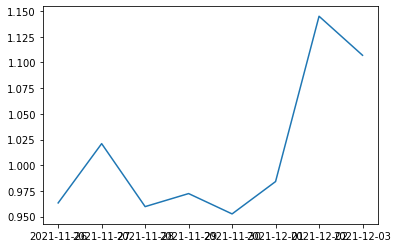

In [114]:
plt.plot(pd.to_datetime(df['time'], unit='s'),df.close)

#### my_data

In [120]:
df['time']=pd.to_datetime(df['time'], unit='s')

In [121]:
#gmt time zone 7 or 8 hours ahead of me
df

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2021-11-26,1.150,0.8974,1.0040,907573.43,874301.48,0.9633,multiply,ETH
1,2021-11-27,1.062,0.9283,0.9633,534906.38,546125.88,1.0210,multiply,ETH
2,2021-11-28,1.076,0.9490,1.0210,328691.49,315453.62,0.9597,multiply,ETH
3,2021-11-29,1.013,0.9613,0.9597,891533.35,866962.61,0.9724,multiply,ETH
4,2021-11-30,1.013,0.9457,0.9724,328410.92,312849.91,0.9526,multiply,ETH
5,2021-12-01,1.004,0.9194,0.9526,423296.04,416553.03,0.9841,multiply,ETH
6,2021-12-02,1.660,0.9341,0.9841,2050789.89,2348058.61,1.1450,multiply,ETH
7,2021-12-03,1.277,1.0300,1.1420,6392673.49,7074621.82,1.1070,multiply,BTC


In [89]:
import cbpro

In [91]:
pc=cbpro.PublicClient()

In [100]:
results=pc.get_products()

In [102]:
for row in results:
    print(row['id'])

DOT-USD
BTC-EUR
KEEP-USD
NKN-USD
AVAX-USD
CGLD-USD
RAD-BTC
CRV-EUR
CRV-USD
ANKR-EUR
MASK-EUR
UMA-USD
SUSHI-GBP
1INCH-USD
BOND-USD
EOS-USD
LTC-USD
UNI-GBP
CVC-USDC
YFI-BTC
RGT-USD
LTC-EUR
TRU-USD
BCH-GBP
POLY-USDT
ALGO-GBP
TRAC-USD
AXS-EUR
UNI-USD
BTC-GBP
XTZ-GBP
MANA-EUR
LPT-USD
MIR-EUR
USDT-USD
ORN-BTC
BCH-EUR
SHIB-USD
UMA-BTC
SHIB-EUR
WCFG-EUR
DAI-USDC
DOT-GBP
GALA-USD
XYO-EUR
SNX-GBP
GNT-USDC
AXS-USD
ADA-EUR
GRT-EUR
OMG-EUR
FET-USD
PERP-USDT
OGN-BTC
DNT-USDC
FIL-EUR
ZEC-BTC
FARM-USD
ASM-USD
TRB-USD
DOT-BTC
ETC-USD
SUSHI-ETH
ETH-USDC
CRO-USD
CHZ-EUR
PLA-USD
ETC-EUR
ADA-ETH
UMA-GBP
WCFG-USDT
REQ-BTC
SUKU-EUR
QNT-USD
SOL-USDT
CLV-GBP
LINK-EUR
SKL-GBP
MANA-USDC
LCX-USD
POWR-EUR
WCFG-GBP
SNX-BTC
MATIC-BTC
AUCTION-USDT
GYEN-USD
TRU-BTC
SOL-USD
MLN-USD
MKR-USD
ARPA-USDT
FIL-GBP
FORTH-EUR
ATOM-GBP
BAL-BTC
DASH-USD
AAVE-BTC
ORN-USD
USDT-EUR
BNT-EUR
WLUNA-EUR
MATIC-GBP
ZEC-USD
ALCX-USD
MIR-GBP
ICP-GBP
PERP-USD
SUSHI-EUR
REQ-GBP
IOTX-BTC
RLY-GBP
OXT-USD
SKL-USD
BAL-USD
ETC-BTC
LCX-EUR
AAVE-EUR

In [103]:
results2=pc.get_currencies()

In [104]:
#gets information about the products
results=pc.get_product_order_book('BTC-USD')

In [105]:
results=pc.get_product_ticker('BTC-USD')

In [106]:
results=pc.get_product_24hr_stats('BTC-USD')

In [123]:
myps=open('../phrase.txt','r').read().splitlines()

In [124]:
myps

['pssp:w8hwi7ji6sk',
 'sc:uYmSc5hFLorSK6neAKp34aFTdfFYx7isauDQkPum+85UrYWbRmAvC5u7+1syCL+WnIGQ7Lr9MyskGn3hoQRLpw==',
 'api:6c0e94708ab33caed175e7a019fc857e']

In [127]:
myps[0].split(':')[1]

'w8hwi7ji6sk'